In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
profile = pd.read_csv('profile.csv', index_col=0)
portfolio = pd.read_csv('portfolio.csv', index_col=0)
transcript = pd.read_csv('transcript.csv', index_col=0)

In [3]:
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [5]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [7]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


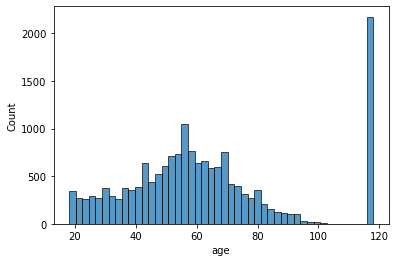

In [8]:
#there are some suspicious aged people in the 'profile'.
sns.histplot(data=profile, x='age')
plt.show()

In [9]:
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

#### The suspicious age is 118.
And the people who have suspicious age also have the null value of 'gender' and 'income'.
It is natural to remove them from the original 'profile' for the future works. 

In [10]:
profile = profile.dropna()
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0


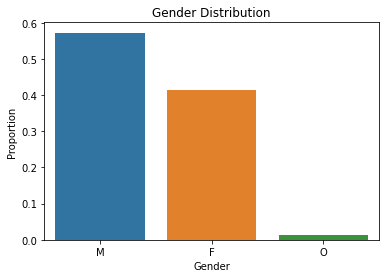

In [11]:
#What is gender distribution?
sns.barplot(x=profile['gender'].value_counts().index, y=profile['gender'].value_counts(normalize=True))
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

### The gender distirbution is like above, the customers consists of about 57% of male, 40% of female and 3% of the 3rd sex.

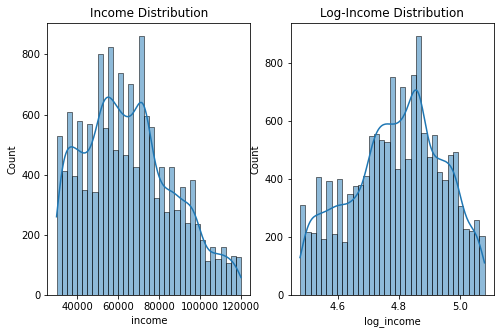

In [12]:
#What is the income distribution?
profile['log_income'] = profile['income'].apply(np.log10)
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

for i, col in enumerate(['income', 'log_income']):
    sns.histplot(ax=axes[i], data=profile, x=col, kde=True)

axes[0].set_title('Income Distribution')
axes[1].set_title('Log-Income Distribution')
plt.show()

In [13]:
print('Average income is: {}'.format(round(profile['income'].mean(), 3)))
print('Median income is: {}'.format(profile['income'].median()))

Average income is: 65404.992
Median income is: 64000.0


In [14]:
#When do people typically become a member? 
profile.dtypes

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
log_income          float64
dtype: object

In [15]:
#we need to convert the datatype of became_member_on to datetime
profile.loc[:, 'became_member_on'] = pd.to_datetime(arg=profile['became_member_on'], format='%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income,log_income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,4.845098
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,4.724276
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,4.707570


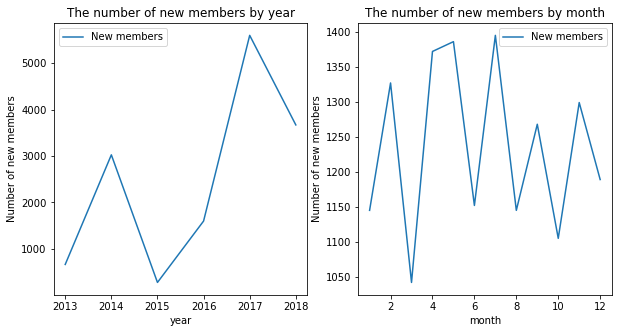

In [16]:
#create new columns year and month and display
profile['year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile['month'] = pd.DatetimeIndex(profile['became_member_on']).month

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, col in enumerate(['year', 'month']):
    sns.lineplot(ax=axes[i], x=profile[col].unique(), y=profile[col].value_counts(), label='New members')
    axes[i].set_title(f'The number of new members by {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Number of new members')
plt.show()

#### The number of members increased highly after 2016. 

In [17]:
profile.head()

,gender,age,id,became_member_on,income,log_income,year,month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,4.845098,2018,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,4.724276,2018,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,4.707570,2017,11


In [18]:
#What is the average purchase distribution?
import re

profile_transcript = profile.merge(right=transcript, how='left', left_on='id', right_on='person')
transaction = profile_transcript.loc[profile_transcript['event'] == 'transaction']
offer = profile_transcript.loc[profile_transcript['event'] != 'transaction']


pattern = re.compile('[\d]+.[\d]+')
transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
transaction.rename(columns={'value': 'amount'}, inplace=True)
transaction = transaction.astype(dtype={'amount': 'float'})

mean_amount_by_id = pd.pivot_table(data=transaction, values='amount', index='id', aggfunc='mean').reset_index()
mean_amount_by_id = mean_amount_by_id.merge(right=profile, how='left', on='id')
mean_amount_by_id.head()

C:\Users\bnite\AppData\Local\Temp/ipykernel_5108/2116192034.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction['value'] = transaction['value'].apply(pattern.findall).str.get(0)
C:\Users\bnite\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,amount,gender,age,became_member_on,income,log_income,year,month
0,0009655768c64bdeb2e877511632db8f,15.950000,M,33,2017-04-21,72000.0,4.857332,2017,4
1,0011e0d4e6b944f998e987f904e8c1e5,15.892000,O,40,2018-01-09,57000.0,4.755875,2018,1
2,0020c2b971eb4e9188eac86d93036a77,24.607500,F,59,2016-03-04,90000.0,4.954243,2016,3
3,0020ccbbb6d84e358d3414a3ff76cffd,12.837500,F,24,2016-11-11,60000.0,4.778151,2016,11
4,003d66b6608740288d6cc97a6903f4f0,2.685556,F,26,2017-06-21,73000.0,4.863323,2017,6


In [22]:
transaction.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528
8,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132
10,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144


In [23]:
mean_amount_by_id.shape, transaction.shape

((14492, 10), (123957, 12))

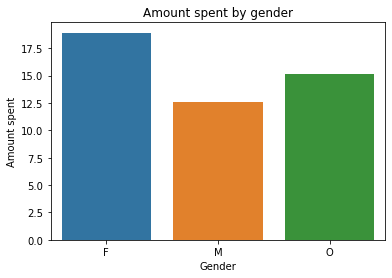

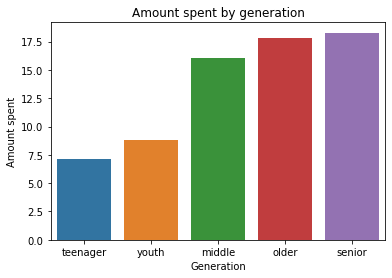

In [19]:
def to_generation(age):
    if age < 20:
        return 'teenager'
    elif age < 40:
        return 'youth'
    elif age < 60:
        return 'middle'
    elif age < 80:
        return 'older'
    else:
        return 'senior'

mean_amount_by_id['generation'] = mean_amount_by_id['age'].apply(to_generation)

gby_gender = mean_amount_by_id.groupby(by='gender').mean()['amount']
sns.barplot(x=gby_gender.index, y=gby_gender)
plt.title('Amount spent by gender')
plt.xlabel('Gender')
plt.ylabel('Amount spent')
plt.show()

gby_generation = mean_amount_by_id.groupby(by='generation').mean()['amount']
sns.barplot(x=gby_generation.index, y=gby_generation, order=['teenager', 'youth', 'middle', 'older', 'senior'])
plt.title('Amount spent by generation')
plt.xlabel('Generation')
plt.ylabel('Amount spent')
plt.show()

#### Female customers spend more compared to all and the middle aged people compared to youth and teenagers.

In [20]:
#Do people react to different promotions differently?

offer = profile_transcript.loc[profile_transcript['event'] == 'offer completed']

ID_LENGTH = 32

offer['offer_id'] = offer['value'].str.slice(start=14, stop=(14 + ID_LENGTH))
offer = offer.drop(labels='value', axis=1)

cleaned_transcript = pd.concat(objs=[transaction, offer]).sort_index()
cleaned_transcript.head()


C:\Users\bnite\AppData\Local\Temp/ipykernel_5108/1288680061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offer['offer_id'] = offer['value'].str.slice(start=14, stop=(14 + ID_LENGTH))


,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN
4,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,23.22,528,NaN
5,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,NaN,528,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,19.89,132,NaN


In [21]:
cleaned_transcript['generation'] = cleaned_transcript['age'].apply(to_generation)
history = cleaned_transcript.merge(right=portfolio, how='left', left_on='offer_id', right_on='id')
history = history.drop(labels=['id_y'], axis=1)
history.rename(columns={'id_x': 'id'}, inplace=True)
history['amount'] = history['amount'].fillna(method='ffill')
history = history.drop_duplicates(subset=['id', 'time'], keep='last')
history.head()

,gender,age,id,became_member_on,income,log_income,year,month,person,event,amount,time,offer_id,generation,reward,channels,difficulty,duration,offer_type
0,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,21.51,18,NaN,middle,NaN,NaN,NaN,NaN,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,transaction,32.28,144,NaN,middle,NaN,NaN,NaN,NaN,NaN
3,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,5.049218,2017,7,0610b486422d4921ae7d2bf64640c50b,offer completed,23.22,528,9b98b8c7a33c4b65b9aebfe6a799e6d9,middle,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
5,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,offer completed,19.89,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,older,5.0,"['web', 'email', 'mobile']",5.0,7.0,bogo
6,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,5.000000,2017,5,78afa995795e4d85b5d9ceeca43f5fef,transaction,17.78,144,NaN,older,NaN,NaN,NaN,NaN,NaN


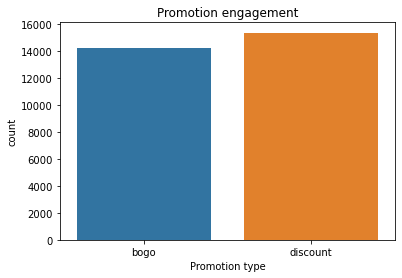

In [24]:
#'offer completed' in 'event' indicates that the customer has engaged the promotion.
offer_completed = history.loc[history['event'] == 'offer completed']

sns.countplot(data=offer_completed, x='offer_type')
plt.title('Promotion engagement')
plt.xlabel('Promotion type')
plt.show()

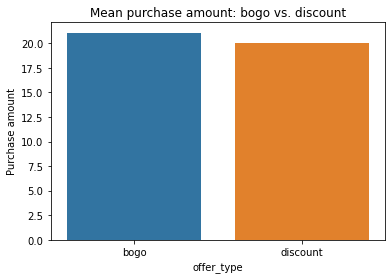

In [25]:
#Interestingly, customers engaged more in the discount promotion than the bogo promotion.
#The 'difficulty'(a.k.a. the minimum required spend) might affect the promotioin engagement.
gby_offer_type = offer_completed.groupby(by='offer_type').mean()['amount']

sns.barplot(x=gby_offer_type.index, y=gby_offer_type)
plt.title('Mean purchase amount: bogo vs. discount')
plt.ylabel('Purchase amount')
plt.show()

#### In spite of little less engagement, bogo shows little higher mean purchase amount than discount.
It might be the effect of the 'difficulty'. 

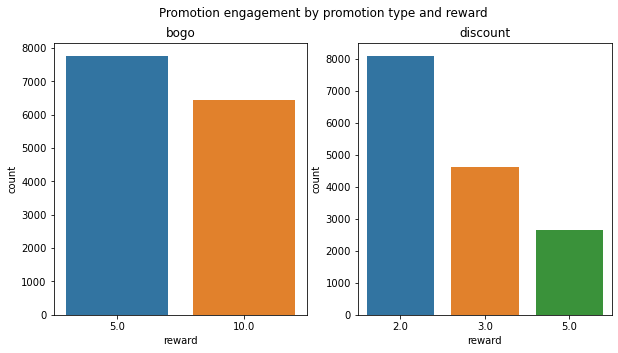

In [26]:
#Does the reward of the promotion make people react differently?
bogo = offer_completed.loc[offer_completed['offer_type'] == 'bogo']
discount = offer_completed.loc[offer_completed['offer_type'] == 'discount']

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(ax=axes[0], data=bogo, x='reward')
sns.countplot(ax=axes[1], data=discount, x='reward')
plt.suptitle('Promotion engagement by promotion type and reward')
axes[0].set_title('bogo')
axes[1].set_title('discount')
plt.show()

#### The lower reward, the more engagements regardless of the promotion type.
In the same mannar, the 'difficulty' might affect to the result. 

In [ ]:
#Does it make sense to offer certain rewards?
history_non_offer = history.loc[history['event'] == 'transaction']
history_offer = history.loc[history['event'] == 'offer completed']

sns.barplot(x=['non_offer', 'offer'], y=[history_non_offer['amount'].mean(), history_offer['amount'].mean()])
plt.title('Mean purchase amount: non_offer vs. offer')
plt.ylabel('Purchase amount')
plt.show()

#### There are about $7.5 of mean purcahse amount difference between 'non_offer' and 'offer'.
Although engaging the promotions needs the minimum required purchase amount(a.k.a. 'difficulty' in our dataset), the difference is pretty significant. 